In [0]:
!pip install pandas_datareader

In [0]:
import seaborn
import matplotlib.pyplot as plt
import pandas_datareader as PDR
import pandas as pd
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 28)
df_2881 = PDR.data.DataReader('2881.TW', 'yahoo', start, end)
df_2882 = PDR.data.DataReader('2882.TW', 'yahoo', start, end)
df_2884 = PDR.data.DataReader('2884.TW', 'yahoo', start, end)
df_2891 = PDR.data.DataReader('2891.TW', 'yahoo', start, end)


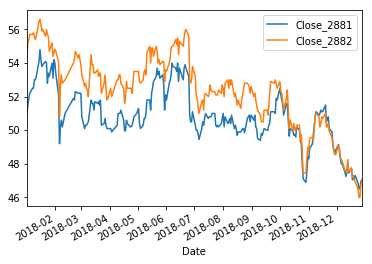

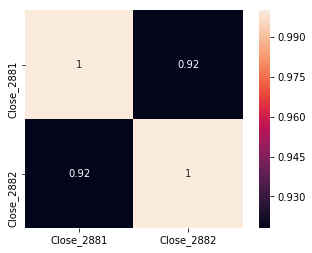

In [0]:
df = pd.concat([df_2881.Close, df_2882.Close], axis = 1)
symbols = ['Close_2881', 'Close_2882']
df.columns = symbols

df.plot()
plt.legend()
plt.show()
seaborn.heatmap(df.corr(), annot=True, square=True)
plt.show()

ADF Test & Cointegration Test

In [0]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import numpy as np

def check_adf(A, B, diff = False, diff_count = 1):
    if diff:
        price_A = np.diff(A, n = diff_count)
        price_B = np.diff(B, n = diff_count)
        adf_A = adfuller(price_A)
        adf_B = adfuller(price_B) 
    else:
        adf_A = adfuller(price_A)
        adf_B = adfuller(price_B)

    print(adf_A)
    print(adf_B)

def check_coint(A, B, diff = False, diff_count = 1):
    if diff:
        price_A = np.diff(A, n = diff_count)
        price_B = np.diff(B, n = diff_count)
        result = coint(price_A, price_B)
    else:
        result = coint(A, B)

    print(result)

price_A = df['Close_2881'].values
price_B = df['Close_2882'].values
check_adf(price_A, price_B, diff = True)
check_coint(price_A, price_B, diff = True)


(-16.009254367749957, 6.382828643249383e-29, 0, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 383.07507514271083)
(-17.894693015734763, 2.968670471943056e-30, 0, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 424.8194236929103)
(-18.007844748304954, 1.8577182840270412e-29, array([-3.94207733, -3.36138999, -3.06194956]))


結果可以看出一階差分之後的數據是平穩的，且兩商品具有協整關係

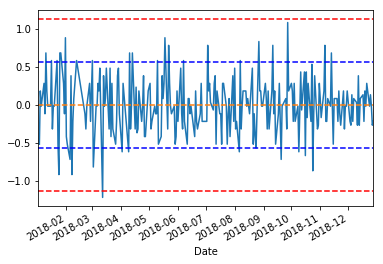

In [200]:
def strategy():
    df['DF_2881'] = df.Close_2881.diff()
    df['DF_2882'] = df.Close_2882.diff()
    df['Spread'] = df.DF_2881 - df.DF_2882
    df['MSpread'] = df.Spread - df.Spread.mean()
    sigma = df.MSpread.std()
    df['SD_0'] = 0
    df['SD_1'] = sigma * 1.5
    df['SD_2'] = sigma * -1.5
    df['SD_3'] = sigma * 3
    df['SD_4'] = sigma * -3

    df.MSpread.plot()
    df['SD_0'].plot(linestyle = 'dashed')
    df['SD_1'].plot(linestyle = 'dashed', color = 'b')
    df['SD_2'].plot(linestyle = 'dashed', color = 'b')
    df['SD_3'].plot(linestyle = 'dashed', color = 'r')
    df['SD_4'].plot(linestyle = 'dashed', color = 'r')
    plt.show()

strategy()